In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = pd.read_csv("iris (1).csv")

# Features and Labels
X = iris.drop('species', axis=1)
y = LabelEncoder().fit_transform(iris['species'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, pred_rbf))

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))
print("Linear Confusion Matrix:\n", confusion_matrix(y_test, pred_linear))


RBF Kernel Accuracy: 1.0
RBF Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Linear Kernel Accuracy: 1.0
Linear Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<ipython-input-1-4690f60118ba>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  letters = letters[letters.iloc[:, 1:].applymap(lambda x: str(x).strip().replace('.', '', 1).isdigit()).all(axis=1)]


SVM Classifier on Letter Recognition Dataset
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0  

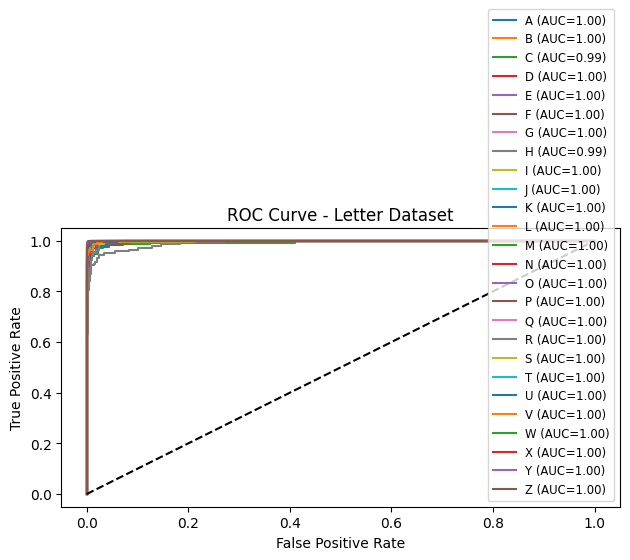

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load and clean letter dataset
letters = pd.read_csv('/content/letter-recognition.csv', header=None)

# Check for non-numeric rows, and drop them
letters = letters[letters.iloc[:, 1:].applymap(lambda x: str(x).strip().replace('.', '', 1).isdigit()).all(axis=1)]

# Convert features to float
X_letters = letters.iloc[:, 1:].astype(float)
y_letters = letters.iloc[:, 0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_letters, y_letters, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
svm_letter = SVC(kernel='rbf', probability=True)
svm_letter.fit(X_train, y_train)
y_pred = svm_letter.predict(X_test)

# Evaluate
print("SVM Classifier on Letter Recognition Dataset")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_scores = svm_letter.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC={roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Letter Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()
